# Transformaciones geométricas 2D y 3D (traslación, rotación, escala)

**Objetivo.** Introducir las transformaciones geométricas básicas (traslación, escalamiento y rotación)
en 2D y 3D usando `NumPy`. Representaremos puntos y objetos como matrices, visualizaremos con
`Matplotlib` (2D/3D) y `plotly` (3D interactivo), y cerraremos con animaciones simples en GIF.

In [ ]:
# Importamos las bibliotecas que usaremos en toda la clase
import numpy as np                      # Para cálculo numérico con arreglos
import matplotlib.pyplot as plt         # Para graficar en 2D/3D con Matplotlib
from mpl_toolkits.mplot3d import Axes3D # Habilita 3D en Matplotlib (import de efecto)
import plotly.graph_objects as go       # Para visualizaciones 3D interactivas

## 1) Introducción: ¿Qué son las transformaciones geométricas?

**Idea:** mover, girar y escalar objetos en el plano o en el espacio.
Una **figura** será un conjunto (finito o denso) de puntos. En código, la guardaremos como una **matriz**
de tamaño `n_puntos × d`, donde `d` es la dimensión (2 o 3).

Pequeño ejemplo: un cuadrado y su **traslación** en el plano (2D).

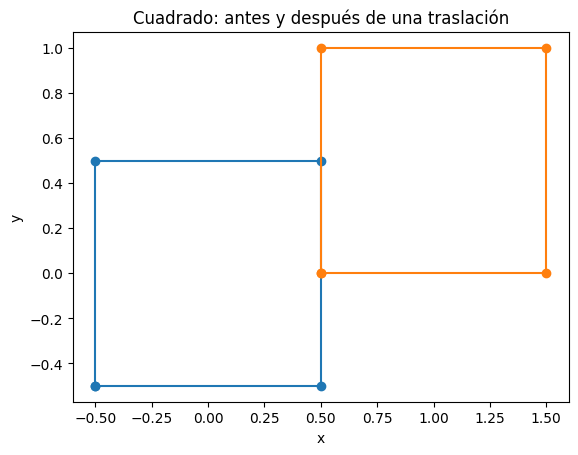

In [18]:

# Definimos un cuadrado unitario centrado en el origen y lo trasladamos
# Nota: En toda la clase intentaremos comentar cada línea para máxima claridad.

# Definimos los vértices del cuadrado en 2D (forma n_puntos × 2)
cuadrado = np.array([
    [-0.5, -0.5],  # vértice 1
    [ 0.5, -0.5],  # vértice 2
    [ 0.5,  0.5],  # vértice 3
    [-0.5,  0.5],  # vértice 4
    [-0.5, -0.5],  # cerramos el contorno repitiendo el primer punto
])

# Vector de traslación (moveremos el cuadrado 1 unidad en x y 0.5 en y)
t = np.array([1.0, 0.5])  # (tx, ty)

# Aplicamos la traslación sumando el vector a todos los puntos (broadcasting de NumPy)
cuadrado_trasladado = cuadrado + t

# Graficamos antes y después con Matplotlib
plt.figure()  # Creamos una figura
# Graficamos el cuadrado original
plt.plot(cuadrado[:,0], cuadrado[:,1], marker='o')  # no especificamos color
# Graficamos el cuadrado trasladado
plt.plot(cuadrado_trasladado[:,0], cuadrado_trasladado[:,1], marker='o')
plt.axis('equal')               # Escalas iguales en ambos ejes
plt.title('Cuadrado: antes y después de una traslación')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2) Representación de puntos y objetos con `NumPy`

**Convención:** Un objeto 2D/3D es una matriz `P` de tamaño `n_puntos × d`.
- Fila `i`: el punto `i`-ésimo.
- Columnas: coordenadas (x, y [, z]).

Abajo definimos funciones para crear figuras básicas y lugares geométricos:
- 2D: triángulo, cuadrado, parábola, elipse, hipérbola.
- 3D: cubo, paraboloide, silla (hiperbólica), toroide tipo *ciclide* (fórmulas paramétricas dadas).
Además mostramos la visualización con `Matplotlib` (2D/3D) y `plotly` (3D interactivo).

### Visualización (2D y 3D con Matplotlib)

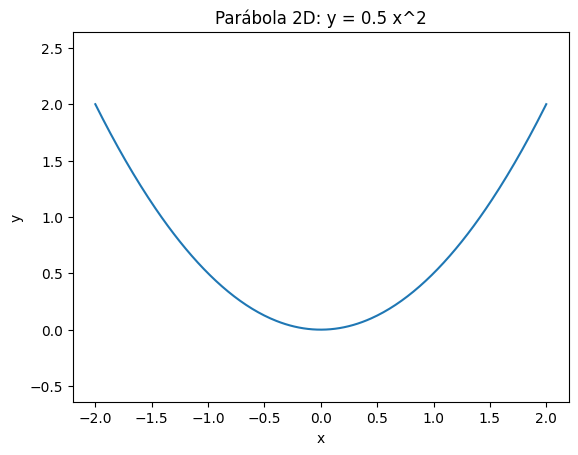

In [ ]:
# ----- 2D: Curvas (parábola, elipse, hipérbola) -----

def parabola_2d(a=1.0, n=200, rango=2.0):
    """
    Parábola y = a*x^2 muestreada en [-rango, rango].
    Devuelve matriz (n_puntos x 2).
    """
    # Creamos n puntos uniformes en [-rango, rango]
    xs = np.linspace(-rango, rango, n)
    # Calculamos y = a*x^2 con comprensión de listas
    ys = np.array([a*(x**2) for x in xs])
    # Apilamos columnas para tener (n x 2)
    P = np.column_stack([xs, ys])
    return P

plt.figure()
P_par = parabola_2d(a=0.5, n=300, rango=2.0)
plt.plot(P_par[:,0], P_par[:,1])
plt.axis('equal')
plt.title('Parábola 2D: y = 0.5 x^2')
plt.xlabel('x'); plt.ylabel('y')
plt.show()


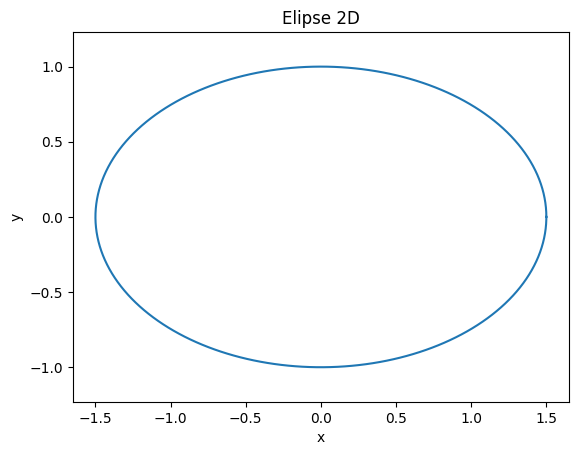

In [ ]:

def elipse_2d(a=1.5, b=1.0, n=400):
    """
    Elipse paramétrica:
      x = a cos t, y = b sin t,  t en [0, 2π].
    Devuelve (n_puntos x 2) y cierra el contorno.
    """
    # Parámetro t uniformemente muestreado
    ts = np.linspace(0.0, 2.0*np.pi, n)
    # Fórmulas paramétricas
    xs = np.array([a*np.cos(t) for t in ts])
    ys = np.array([b*np.sin(t) for t in ts])
    # Matriz de puntos
    P = np.column_stack([xs, ys])
    return P

plt.figure()
P_eli = elipse_2d(a=1.5, b=1.0, n=400)
plt.plot(P_eli[:,0], P_eli[:,1])
plt.axis('equal')
plt.title('Elipse 2D')
plt.xlabel('x'); plt.ylabel('y')
plt.show()


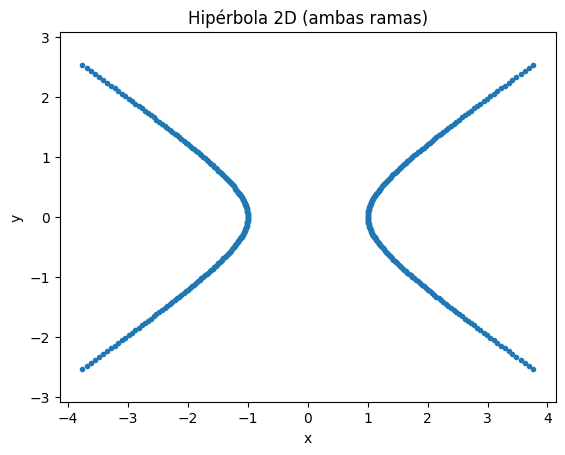

In [ ]:
def hiperbola_2d(a=1.0, b=1.0, n=400, tmax=2.0):
    """
    Hipérbola (dos ramas) usando parametrización con funciones hiperbólicas:
      Rama 1: x = a cosh t, y = b sinh t
      Rama 2: x = -a cosh t, y = b sinh t
    con t en [-tmax, tmax]. Devuelve una sola matriz apilando ambas ramas.
    """
    # Vector de parámetros t
    ts = np.linspace(-tmax, tmax, n//2)
    # Rama derecha
    x1 = np.array([a*np.cosh(t) for t in ts])
    y1 = np.array([b*np.sinh(t) for t in ts])
    # Rama izquierda (x negativo)
    x2 = -x1.copy()
    y2 = y1.copy()
    # Apilamos ambas ramas
    P = np.vstack([np.column_stack([x1, y1]), np.column_stack([x2, y2])])
    return P

plt.figure()
P_hip = hiperbola_2d(a=1.0, b=0.7, n=400, tmax=2.0)
plt.plot(P_hip[:,0], P_hip[:,1], linestyle='none', marker='.')
plt.axis('equal')
plt.title('Hipérbola 2D (ambas ramas)')
plt.xlabel('x'); plt.ylabel('y')
plt.show()


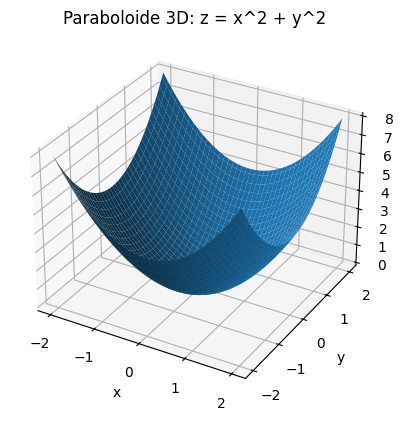

In [40]:

# ----- 3D: Superficies con Matplotlib -----
def malla_xy(r=2.0, n=60):
    """
    Crea una malla regular en el plano XY en [-r, r] × [-r, r].
    Devuelve X, Y (mallas) y un vector 'pts' con todos los puntos (n^2 x 3).
    """
    # Coordenadas en X y Y
    xs = np.linspace(-r, r, n)
    ys = np.linspace(-r, r, n)
    # Malla rectangular
    X, Y = np.meshgrid(xs, ys)
    # Apilamos los puntos (z=0 por ahora)
    Z = np.zeros_like(X)
    pts = np.column_stack([X.ravel(), Y.ravel(), Z.ravel()])
    return X, Y, pts

def paraboloide_3d(r=2.0, n=80):
    """
    Paraboloide: z = x^2 + y^2 sobre [-r, r]^2.
    Devuelve X, Y, Z para graficar como superficie.
    """
    # Obtenemos la malla XY
    X, Y, _ = malla_xy(r=r, n=n)
    # Definimos la superficie
    Z = X**2 + Y**2
    return X, Y, Z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = paraboloide_3d(r=2.0, n=80)
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True)  # sin especificar color
ax.set_title('Paraboloide 3D: z = x^2 + y^2')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.show()


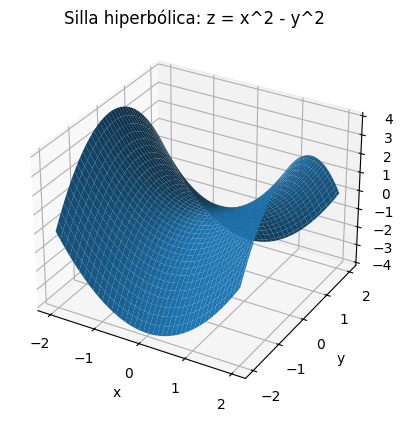

In [41]:
def silla_3d(r=2.0, n=80):
    """
    Silla hiperbólica: z = x^2 - y^2.
    Devuelve X, Y, Z para graficar como superficie.
    """
    X, Y, _ = malla_xy(r=r, n=n)
    Z = X**2 - Y**2
    return X, Y, Z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = silla_3d(r=2.0, n=80)
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True)
ax.set_title('Silla hiperbólica: z = x^2 - y^2')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.show()


### Visualización (2D y 3D con plotly)

In [24]:
def esfera_parametrica(radio=1.0, n=60):
    """
    esfera_parametrica(radio, n) -> (X, Y, Z)
    Malla de esfera con parámetros (u, v): u ∈ [0, 2π], v ∈ [0, π].
    """
    # Parametrización de la esfera
    u = np.linspace(0.0, 2.0 * np.pi, n)  # Longitudinal
    v = np.linspace(0.0, np.pi, n)        # Latitudinal
    # Crear mallas 2D para u y v
    U, V = np.meshgrid(u, v)  # Mallas de parámetros
    # Ecuaciones paramétricas de la esfera
    X = radio * np.cos(U) * np.sin(V)  # x(u, v)
    Y = radio * np.sin(U) * np.sin(V)  # y(u, v)
    Z = radio * np.cos(V)              # z(u, v)
    # Regresar malla
    return X, Y, Z  # Superficie (n, n)

def superficie_paraboloide(x_min=-2.0, x_max=2.0, y_min=-2.0, y_max=2.0, n=80):
    """
    superficie_paraboloide(x_min, x_max, y_min, y_max, n) -> (X, Y, Z)
    Genera el paraboloide z = x^2 + y^2 en una región rectangular.
    """
    # Mallas uniformes en x e y
    x = np.linspace(x_min, x_max, n)  # Vector de x
    y = np.linspace(y_min, y_max, n)  # Vector de y
    X, Y = np.meshgrid(x, y)          # Malla 2D
    # Definir la superficie z
    Z = X**2 + Y**2  # Paraboloide elíptico
    # Regresar malla
    return X, Y, Z  # Superficie (n, n)

def superficie_silla(x_min=-2.0, x_max=2.0, y_min=-2.0, y_max=2.0, n=80):
    """
    superficie_silla(x_min, x_max, y_min, y_max, n) -> (X, Y, Z)
    Genera la superficie de silla (paraboloide hiperbólico) z = x^2 - y^2.
    """
    # Mallas uniformes
    x = np.linspace(x_min, x_max, n)  # Vector de x
    y = np.linspace(y_min, y_max, n)  # Vector de y
    X, Y = np.meshgrid(x, y)          # Malla 2D
    # Definir z
    Z = X**2 - Y**2  # Silla
    # Regresar malla
    return X, Y, Z  # Superficie (n, n)


def superficie_funcion(x_min=-2.0, x_max=2.0, y_min=-2.0, y_max=2.0, n=80, f=None):
    """
    superficie_funcion(x_min, x_max, y_min, y_max, n, f) -> (X, Y, Z)
    Genera una superficie z = f(x, y) en una región rectangular compacta.
    """
    # Crear malla en el dominio
    x = np.linspace(x_min, x_max, n)  # Vector de x
    y = np.linspace(y_min, y_max, n)  # Vector de y
    X, Y = np.meshgrid(x, y)          # Malla 2D
    # Si no se pasa función, usar una por defecto tipo "sábana"
    if f is None:  # Verificar si no hay función
        f = lambda X, Y: np.sin(X) + np.sin(Y)  # Superficie suave tipo sábana
    # Evaluar la función sobre la malla
    Z = f(X, Y)  # z = f(x, y)
    # Regresar la malla de la superficie
    return X, Y, Z  # Superficie (n, n)


def superficie_toroide(a=3.0, b=1.0, c=1.0, d=2.0, n=120):
    """
    superficie_toroide(a, b, c, d, n) -> (X, Y, Z)
    Superficie tipo toro/cíclide definida por:
        x = (d*(c - a*cos(u)*cos(v)) + b^2*cos(u)) / (a - c*cos(u)*cos(v))
        y =  b*sin(u)*(a - d*cos(v)) / (a - c*cos(u)*cos(v))
        z =  b*sin(v)*(c*cos(u) - d) / (a - c*cos(u)*cos(v))
    con u ∈ [0, 2π], v ∈ [0, 2π].
    """
    # Parámetros u y v
    u = np.linspace(0.0, 2.0 * np.pi, n)  # Vector u
    v = np.linspace(0.0, 2.0 * np.pi, n)  # Vector v
    U, V = np.meshgrid(u, v)              # Mallas U, V
    # Denominador común
    denom = (a - c * np.cos(U) * np.cos(V))  # Denominador de las ecuaciones
    # Ecuaciones paramétricas
    X = (d * (c - a * np.cos(U) * np.cos(V)) + b**2 * np.cos(U)) / denom  # x(u, v)
    Y = (b * np.sin(U) * (a - d * np.cos(V))) / denom                     # y(u, v)
    Z = (b * np.sin(V) * (c * np.cos(U) - d)) / denom                     # z(u, v)
    # Regresar malla
    return X, Y, Z  # Superficie (n, n)

In [23]:
def graficar_superficie_mpl(X, Y, Z, titulo="Superficie (matplotlib)"):
    """
    graficar_superficie_mpl(X, Y, Z, titulo) -> None
    Dibuja una superficie z = Z(X, Y) con matplotlib (interacción limitada).
    """
    # Crear figura y ejes 3D
    fig = plt.figure()  # Nueva figura
    ax = fig.add_subplot(111, projection='3d')  # Ejes 3D
    # Dibujar la superficie
    ax.plot_surface(X, Y, Z)  # Superficie
    # Título y rejilla
    ax.set_title(titulo)  # Título
    ax.grid(True)         # Rejilla
    # Mostrar
    plt.show()  # Renderizar
    
def graficar_superficie_plotly(X, Y, Z, titulo="Superficie (plotly)"):
    """
    graficar_superficie_plotly(X, Y, Z, titulo) -> None
    Dibuja una superficie z = Z(X, Y) con plotly para interacción con el mouse.
    """
    # Construir figura de plotly
    fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])  # Crear superficie interactiva
    # Título
    fig.update_layout(title=titulo)  # Establecer título
    # Mostrar la figura interactiva
    fig.show()  # Renderizar (interactivo)

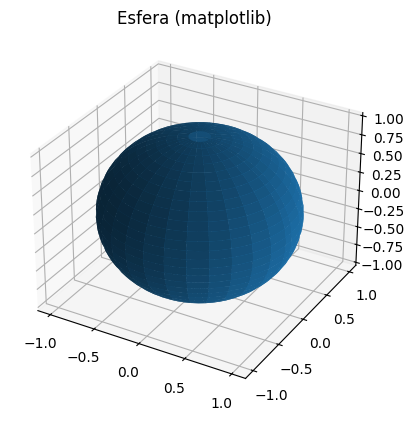

In [25]:
# Esfera
X_s, Y_s, Z_s = esfera_parametrica(radio=1.0, n=60)  # Malla de esfera
graficar_superficie_mpl(X_s, Y_s, Z_s, titulo="Esfera (matplotlib)")  # Visualizar con matplotlib
graficar_superficie_plotly(X_s, Y_s, Z_s, titulo="Esfera (plotly)")   # Visualizar con plotly

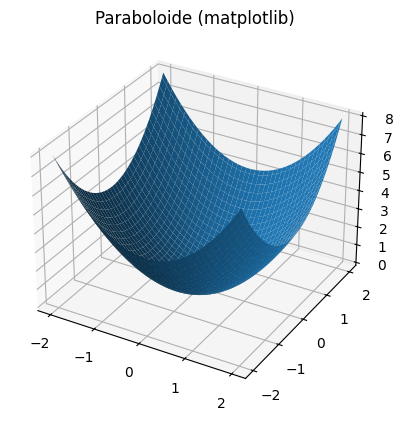

In [ ]:
# Paraboloide
X_p, Y_p, Z_p = superficie_paraboloide()  # Paraboloide
graficar_superficie_mpl(X_p, Y_p, Z_p, titulo="Paraboloide (matplotlib)")  # Matplotlib
graficar_superficie_plotly(X_p, Y_p, Z_p, titulo="Paraboloide (plotly)")   # Plotly

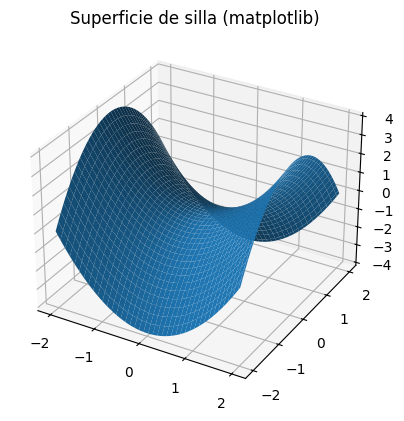

In [28]:
# Silla
X_si, Y_si, Z_si = superficie_silla()  # Silla
graficar_superficie_mpl(X_si, Y_si, Z_si, titulo="Superficie de silla (matplotlib)")  # Matplotlib
graficar_superficie_plotly(X_si, Y_si, Z_si, titulo="Superficie de silla (plotly)")   # Plotly

In [ ]:
# Superficies de funciones (exponencial, trigonométrica, polinómica, tipo sábana)
X_f1, Y_f1, Z_f1 = superficie_funcion(f=lambda X, Y: np.exp(-(X**2 + Y**2)))  # Exponencial
graficar_superficie_plotly(X_f1, Y_f1, Z_f1, titulo="z = exp(-(x^2 + y^2)) (plotly)")  # Plotly

In [31]:
X_f2, Y_f2, Z_f2 = superficie_funcion(f=lambda X, Y: np.sin(X) * np.cos(Y))  # Trigonométrica
graficar_superficie_plotly(X_f2, Y_f2, Z_f2, titulo="z = sin(x) cos(y) (plotly)")  # Plotly

In [32]:
X_f3, Y_f3, Z_f3 = superficie_funcion(f=lambda X, Y: X**2 + Y**2)  # Polinómica (paraboloide)
graficar_superficie_plotly(X_f3, Y_f3, Z_f3, titulo="z = x^2 + y^2 (plotly)")  # Plotly

In [33]:
X_f4, Y_f4, Z_f4 = superficie_funcion(f=lambda X, Y: np.sin(X) + np.sin(Y))  # Tipo sábana
graficar_superficie_plotly(X_f4, Y_f4, Z_f4, titulo="z = sin(x) + sin(y) (plotly)")  # Plotly

In [34]:
# Superficie tipo toro/cíclide (parámetros elegidos para evitar singularidades)
X_t, Y_t, Z_t = superficie_toroide(a=1.32, b=1.0, c=1.32**2 - 1.0**2, d=0.8, n=160)  # Malla toroide
graficar_superficie_plotly(X_t, Y_t, Z_t, titulo="Superficie tipo toro (plotly)")  # Plotly

## 3) Traslación (2D/3D)

**Definición (simple):** si `P` es una matriz `n × d` de puntos y `t` es un vector de longitud `d`,
la traslación es `P + t` (broadcasting). Implementamos una función y graficamos antes/después.

In [42]:
# -----------------------------
# Constructores de figuras 2D
# -----------------------------

def triangulo_2d():
    """
    Regresa un triángulo en 2D como matriz (n_puntos x 2) que cierra su contorno.
    """
    # Definimos 3 vértices y repetimos el primero al final para cerrar
    P = np.array([
        [0.0, 0.0],   # vértice A
        [1.0, 0.0],   # vértice B
        [0.5, 0.8],   # vértice C
        [0.0, 0.0],   # cerramos
    ])
    return P

def cuadrado_2d(lado=1.0):
    """
    Regresa un cuadrado centrado en el origen, de lado 'lado',
    como matriz (n_puntos x 2) cerrada.
    """
    # Mitad del lado
    h = lado/2.0
    # Lista de vértices en sentido antihorario, cerrando al final
    P = np.array([
        [-h, -h],
        [ h, -h],
        [ h,  h],
        [-h,  h],
        [-h, -h],
    ])
    return P

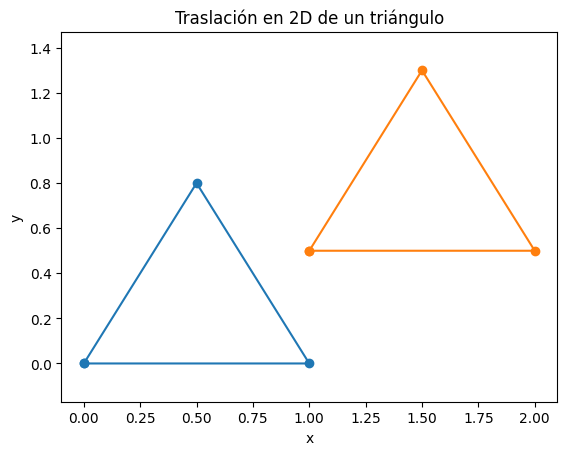

In [43]:
def trasladar(P, t):
    """
    Aplica una traslación a una nube de puntos P (n × d) sumando el vector t (longitud d).
    """
    # Suma por broadcasting: suma t a cada fila de P
    return P + t

# Demostración en 2D con un triángulo
P = triangulo_2d()
t = np.array([1.0, 0.5])
P2 = trasladar(P, t)

plt.figure()
plt.plot(P[:,0], P[:,1], marker='o')
plt.plot(P2[:,0], P2[:,1], marker='o')
plt.axis('equal')
plt.title('Traslación en 2D de un triángulo')
plt.xlabel('x'); plt.ylabel('y')
plt.show()


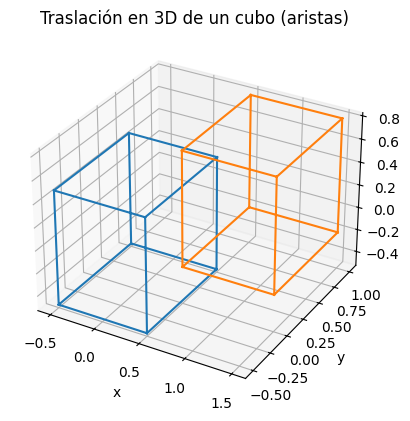

In [44]:
# -----------------------------
# Constructores de figuras 3D
# -----------------------------

def cubo_3d(lado=1.0):
    """
    Regresa una nube de puntos (malla de vértices de aristas) de un cubo centrado
    en el origen de lado 'lado'. Devuelve matriz (n_puntos x 3).
    """
    # Mitad del lado
    h = lado/2.0
    # Vértices del cubo
    vs = np.array([
        [-h,-h,-h],[ h,-h,-h],[ h, h,-h],[-h, h,-h],  # cara z=-h
        [-h,-h, h],[ h,-h, h],[ h, h, h],[-h, h, h],  # cara z=+h
    ])
    # Aristas como pares de índices de vértice
    aristas = [
        (0,1),(1,2),(2,3),(3,0),  # base
        (4,5),(5,6),(6,7),(7,4),  # tapa
        (0,4),(1,5),(2,6),(3,7),  # columnas
    ]
    # Construimos una polilínea de todas las aristas (para graficar fácil)
    lineas = []
    for i,j in aristas:
        lineas.append(vs[i])
        lineas.append(vs[j])
        lineas.append([np.nan,np.nan,np.nan])  # separador para ploteo
    return np.array(lineas)

# Demostración en 3D con un cubo (trazado de aristas)
P3d = cubo_3d(lado=1.0)
t3 = np.array([1.0, 0.5, 0.3])
P3d_2 = trasladar(P3d, t3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(P3d[:,0], P3d[:,1], P3d[:,2])
ax.plot(P3d_2[:,0], P3d_2[:,1], P3d_2[:,2])
ax.set_title('Traslación en 3D de un cubo (aristas)')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.show()

## 4) Escalamiento (2D y 3D)

**Matrices de escala:**

- En 2D: $$ S = \begin{pmatrix} s_x & 0 \\ 0 & s_y \end{pmatrix} $$
- En 3D: $$ S = \mathrm{diag}(s_x,s_y,s_z) $$

La aplicación es **multiplicar** a la derecha: `P @ S^T` (o a la izquierda si trabajamos con vectores columna).
Abajo implementamos funciones y ejemplos (cuadrado, cubo, esfera, tetraedro).

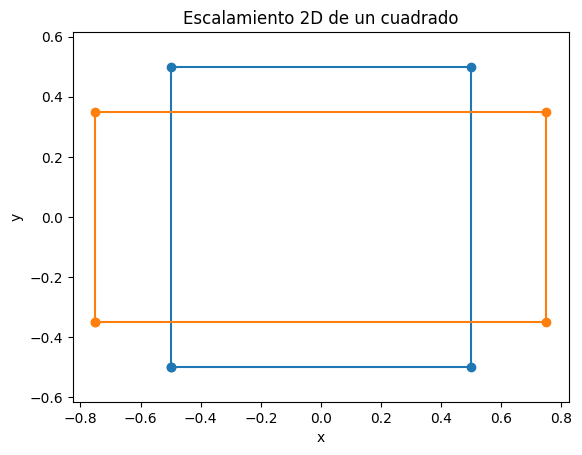

In [10]:
def matriz_escala_2d(sx, sy):
    """
    Crea una matriz de escala 2x2 con factores sx y sy.
    """
    # Matriz diagonal con sx y sy
    return np.array([[sx, 0.0],
                     [0.0, sy]])

def matriz_escala_3d(sx, sy, sz):
    """
    Crea una matriz de escala 3x3 con factores sx, sy, sz.
    """
    # Matriz diagonal 3x3
    return np.array([[sx, 0.0, 0.0],
                     [0.0, sy, 0.0],
                     [0.0, 0.0, sz]])

def aplicar_matriz(P, M):
    """
    Aplica la matriz M a la derecha: Q = P @ M^T.
    P es (n × d), M es (d × d), devuelve Q (n × d).
    """
    # Multiplicamos por la traspuesta para respetar puntos como filas
    return P @ M.T

# Escalamiento de un cuadrado en 2D
P = cuadrado_2d(lado=1.0)
S = matriz_escala_2d(1.5, 0.7)
P2 = aplicar_matriz(P, S)

plt.figure()
plt.plot(P[:,0], P[:,1], marker='o')
plt.plot(P2[:,0], P2[:,1], marker='o')
plt.axis('equal')
plt.title('Escalamiento 2D de un cuadrado')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

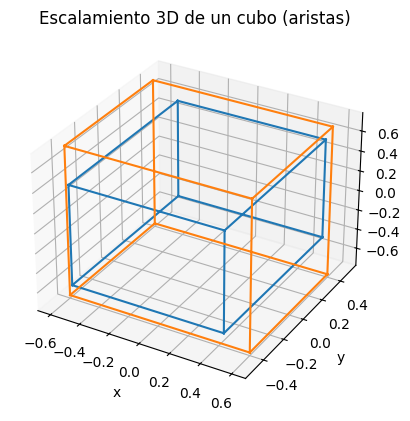

In [11]:
# Escalamiento de un cubo en 3D (aristas)
P3d = cubo_3d(lado=1.0)
S3 = matriz_escala_3d(1.2, 0.8, 1.5)
P3d_esc = aplicar_matriz(P3d, S3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(P3d[:,0], P3d[:,1], P3d[:,2])
ax.plot(P3d_esc[:,0], P3d_esc[:,1], P3d_esc[:,2])
ax.set_title('Escalamiento 3D de un cubo (aristas)')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.show()

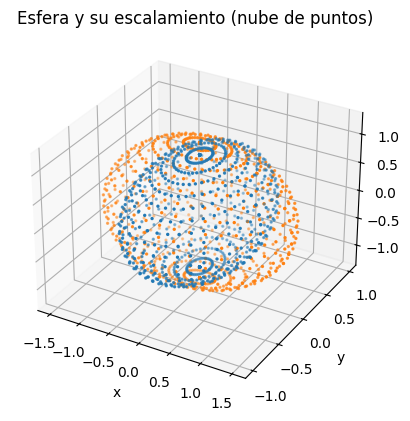

In [45]:
# Esfera (nube de puntos) y tetraedro: ejemplo de escalamiento
def esfera_puntos(n_theta=40, n_phi=80, radio=1.0):
    """
    Devuelve puntos sobre una esfera x^2 + y^2 + z^2 = radio^2.
    Retorna matriz (n_puntos x 3).
    """
    # Ángulos esféricos
    thetas = np.linspace(0.0, np.pi, n_theta)     # polar
    phis   = np.linspace(0.0, 2.0*np.pi, n_phi)   # azimutal
    # Malla
    T, P = np.meshgrid(thetas, phis, indexing='ij')
    # Fórmulas esféricas
    X = radio * np.sin(T) * np.cos(P)
    Y = radio * np.sin(T) * np.sin(P)
    Z = radio * np.cos(T)
    # Devolvemos como nube de puntos
    return np.column_stack([X.ravel(), Y.ravel(), Z.ravel()])

def tetraedro_vertices():
    """
    Vértices de un tetraedro regular centrado en el origen (aprox).
    Devuelve (4 x 3) y una polilínea de aristas para graficar.
    """
    # Cuatro vértices (configuración clásica)
    V = np.array([
        [ 1.0,  1.0,  1.0],
        [ 1.0, -1.0, -1.0],
        [-1.0,  1.0, -1.0],
        [-1.0, -1.0,  1.0],
    ]) / np.sqrt(3.0)  # normalizamos para centrar/escala comparable
    # Aristas (pares de índices)
    E = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
    # Polilínea con separadores NaN
    lineas = []
    for i,j in E:
        lineas.append(V[i]); lineas.append(V[j]); lineas.append([np.nan,np.nan,np.nan])
    return V, np.array(lineas)

# Esfera escalada
pts_esfera = esfera_puntos(n_theta=20, n_phi=40, radio=1.0)
S3 = matriz_escala_3d(1.5, 0.7, 1.2)
pts_esfera_esc = aplicar_matriz(pts_esfera, S3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts_esfera[:,0], pts_esfera[:,1], pts_esfera[:,2], s=2)
ax.scatter(pts_esfera_esc[:,0], pts_esfera_esc[:,1], pts_esfera_esc[:,2], s=2)
ax.set_title('Esfera y su escalamiento (nube de puntos)')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.show()


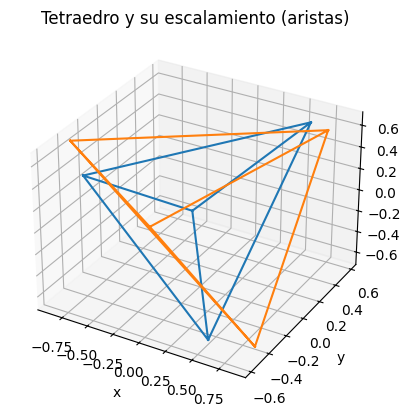

In [46]:

# Tetraedro escalado
V, lineas = tetraedro_vertices()
lineas_esc = aplicar_matriz(lineas, S3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(lineas[:,0], lineas[:,1], lineas[:,2])
ax.plot(lineas_esc[:,0], lineas_esc[:,1], lineas_esc[:,2])
ax.set_title('Tetraedro y su escalamiento (aristas)')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.show()

## 5) Rotación (2D y 3D respecto al origen)

**Rotación 2D por ángulo** \( \theta \):
$$
R(\theta) =
\begin{pmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{pmatrix}.
$$

**Rotación 3D (respecto a ejes cartesianos):**
- Al rededor de $x$:  
$R_x(\theta) = \begin{pmatrix}1&0&0\\0&\cos\theta&-\sin\theta\\0&\sin\theta&\cos\theta\end{pmatrix}$
- Al rededor de $y$:  
$R_y(\theta) = \begin{pmatrix}\cos\theta&0&\sin\theta\\0&1&0\\-\sin\theta&0&\cos\theta\end{pmatrix}$
- Al rededor de $z$:  
$R_z(\theta) = \begin{pmatrix}\cos\theta&-\sin\theta&0\\\sin\theta&\cos\theta&0\\0&0&1\end{pmatrix}$

**Implementación:** multiplicación matricial.

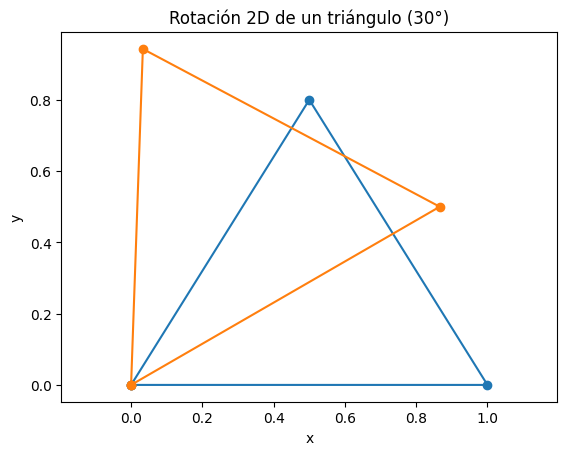

In [47]:
def matriz_rotacion_2d(theta):
    """
    Devuelve la matriz de rotación 2x2 de un ángulo theta (radianes).
    """
    c = np.cos(theta)  # coseno
    s = np.sin(theta)  # seno
    return np.array([[ c, -s],
                     [ s,  c]])

def Rx(alpha):
    """
    Matriz de rotación 3x3 alrededor del eje X por ángulo alpha (radianes).
    """
    c = np.cos(alpha); s = np.sin(alpha)
    return np.array([[1.0, 0.0, 0.0],
                     [0.0,   c,  -s],
                     [0.0,   s,   c]])

def Ry(beta):
    """
    Matriz de rotación 3x3 alrededor del eje Y por ángulo beta (radianes).
    """
    c = np.cos(beta); s = np.sin(beta)
    return np.array([[  c, 0.0,  s],
                     [0.0, 1.0, 0.0],
                     [ -s, 0.0,  c]])

def Rz(gamma):
    """
    Matriz de rotación 3x3 alrededor del eje Z por ángulo gamma (radianes).
    """
    c = np.cos(gamma); s = np.sin(gamma)
    return np.array([[  c, -s, 0.0],
                     [  s,  c, 0.0],
                     [0.0, 0.0, 1.0]])

def rotar_3d(P, alpha=0.0, beta=0.0, gamma=0.0):
    """
    Rota puntos 3D aplicando Rz(gamma) @ Ry(beta) @ Rx(alpha).
    Devuelve P @ (R_total)^T para puntos como filas.
    """
    R = Rz(gamma) @ Ry(beta) @ Rx(alpha)
    return P @ R.T

# Rotación 2D de un triángulo
P = triangulo_2d()
theta = np.deg2rad(30.0)  # 30 grados a radianes
R2 = matriz_rotacion_2d(theta)
P2 = aplicar_matriz(P, R2)

plt.figure()
plt.plot(P[:,0], P[:,1], marker='o')
plt.plot(P2[:,0], P2[:,1], marker='o')
plt.axis('equal')
plt.title('Rotación 2D de un triángulo (30°)')
plt.xlabel('x'); plt.ylabel('y')
plt.show()


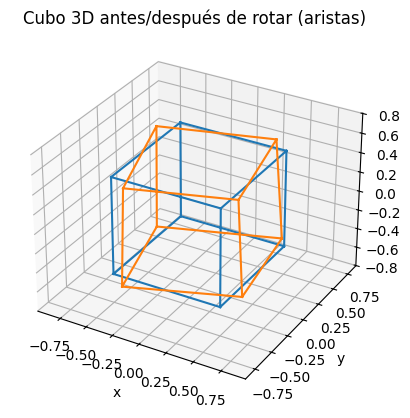

In [48]:

# Rotación 3D de un cubo (aristas)
P3d = cubo_3d(lado=1.0)
P3d_rot = rotar_3d(P3d, alpha=np.deg2rad(25), beta=np.deg2rad(15), gamma=np.deg2rad(40))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(P3d[:,0], P3d[:,1], P3d[:,2])
ax.plot(P3d_rot[:,0], P3d_rot[:,1], P3d_rot[:,2])
ax.set_title('Cubo 3D antes/después de rotar (aristas)')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.show()

## 6) Composición de transformaciones: el **orden** importa

Para transformaciones lineales (rotaciones, escalas) podemos **multiplicar matrices**:

- Si aplicamos primero `S` y luego `R`, el resultado es `R @ S`.
- Si aplicamos primero `R` y luego `S`, el resultado es `S @ R`.

Generalmente `R @ S ≠ S @ R`.

> Nota: La **traslación** no es lineal en coordenadas estándar, por eso no cabe en una matriz `2×2` o `3×3`. Para combinar con traslaciones en una sola multiplicación, se usan **coordenadas homogéneas** (matrices `3×3` en 2D, `4×4` en 3D). Aquí mantendremos la implementación simple y mostraremos el efecto del orden con ejemplos.

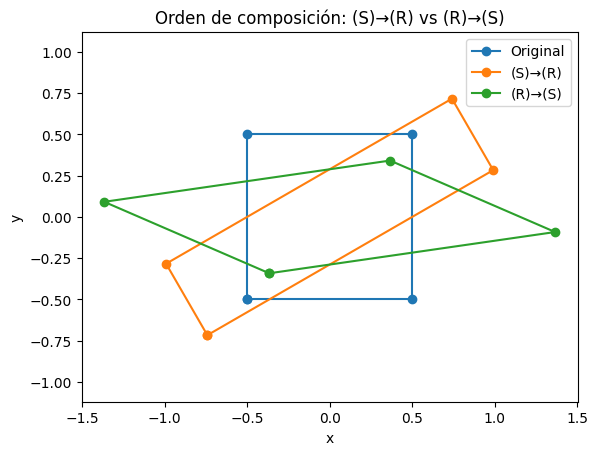

In [14]:
# Ejemplo 2D: cuadrado con rotación y escala en distinto orden
P = cuadrado_2d(lado=1.0)
R = matriz_rotacion_2d(np.deg2rad(30.0))  # rotar 30°
S = matriz_escala_2d(2.0, 0.5)            # estirar x2 en x, x0.5 en y

# Orden 1: primero S luego R -> matriz compuesta R @ S
M1 = R @ S
P1 = aplicar_matriz(P, M1)

# Orden 2: primero R luego S -> matriz compuesta S @ R
M2 = S @ R
P2 = aplicar_matriz(P, M2)

plt.figure()
plt.plot(P[:,0], P[:,1], marker='o', label='Original')
plt.plot(P1[:,0], P1[:,1], marker='o', label='(S)→(R)')
plt.plot(P2[:,0], P2[:,1], marker='o', label='(R)→(S)')
plt.axis('equal')
plt.title('Orden de composición: (S)→(R) vs (R)→(S)')
plt.xlabel('x'); plt.ylabel('y')
plt.legend()
plt.show()

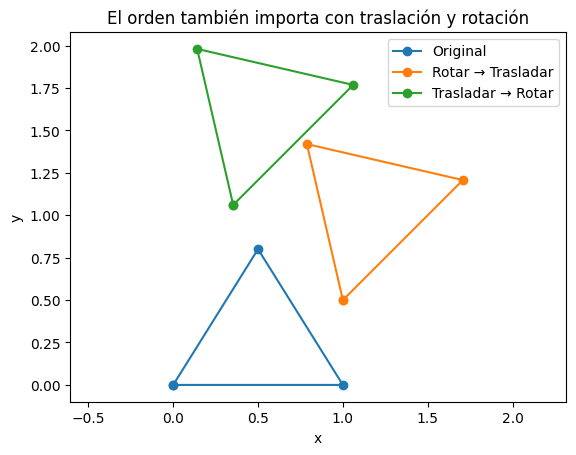

In [ ]:
# Efecto del orden con traslación y rotación 
P = triangulo_2d()
t = np.array([1.0, 0.5])
theta = np.deg2rad(45.0)
R = matriz_rotacion_2d(theta)

# Caso A: primero rotar, luego trasladar
PA = aplicar_matriz(P, R)
PA = trasladar(PA, t)

# Caso B: primero trasladar, luego rotar
PB = trasladar(P, t)
PB = aplicar_matriz(PB, R)

plt.figure()
plt.plot(P[:,0], P[:,1], marker='o', label='Original')
plt.plot(PA[:,0], PA[:,1], marker='o', label='Rotar → Trasladar')
plt.plot(PB[:,0], PB[:,1], marker='o', label='Trasladar → Rotar')
plt.axis('equal')
plt.title('El orden también importa con traslación y rotación')
plt.xlabel('x'); plt.ylabel('y')
plt.legend()

## 8) Ejercicios prácticos

1. **Trasladar y escalar curvas 2D.**  
   (a) Genera una **elipse** con `elipse_2d(a,b)` y aplícale una traslación `t=(1,0.5)`.  
   (b) A la curva trasladada aplícale una **escala no uniforme** con `S = matriz_escala_2d(1.2, 0.6)`.  
   Dibuja antes y después en la **misma** figura y explica brevemente qué observas.

2. **Rotación 2D de un triángulo.**  
   Usa `triangulo_2d()` y rota la figura `15°`, `45°` y `90°`. Dibuja las tres versiones en figuras separadas.
   ¿Qué puntos quedan invariantes? ¿Qué ocurre con el área del triángulo? (Responder con intuición).

3. **Cubo 3D: rotación y escalamiento.**  
   (a) Construye un cubo con `cubo_3d()`.  
   (b) Rótalo con `rotar_3d` (elige ángulos moderados).  
   (c) Escálalo de forma no uniforme con `matriz_escala_3d`.  
   Dibuja antes y después (aristas) y comenta: ¿se preservan ángulos/longitudes/volúmenes?

4. **Composición: orden importa.**  
   Repite el ejemplo de la Sección 6 con otros valores de `S` y `R`. Muestra en una misma figura `P`, `R@S(P)`
   y `S@R(P)` e interpreta las diferencias.

5. **Superficies 3D con plotly.**  
   (a) Grafica un **paraboloide** y una **silla** con `plotly`.  
   (b) Interactúa con la figura (rotar/zoom) y comenta qué te ayuda a percibir la forma mejor que en una imagen 2D.